In [1]:
import sys
sys.path.append('/Library/Python/2.7/site-packages')
from scipy.sparse import diags
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def H_qubit(Ec, Ej, N_cutoff, ng, flux, d):
    # nondiag elements #
    nondiag = -0.5*Ej*np.cos(np.pi*flux)*np.sqrt(1 + (d *np.tan(np.pi*flux))**2)
    
    # diag elements #
    diag = []
    for n_charge in range(-N_cutoff, N_cutoff + 1, 1):
        diag.append(4*Ec*(n_charge - ng)**2)

    # return a sparse matrix #
    return diags([nondiag, diag, nondiag], [-1, 0, 1], shape=(2*N_cutoff+1, 2*N_cutoff+1)).toarray()

In [3]:
def a(number):
    diag = np.sqrt(range(1, number))
    N_c = diags([diag], [1], shape=(number, number)).toarray()
    return N_c

def ket(number, state):
    ket = np.zeros(number)
    ket[state] = 1
    ket.reshape(number, 1)
    return ket
    
def bra(number, state):
    return ket(number, state)[np.newaxis].T.reshape(1,number)
    
def average(operater_list):
    return reduce(lambda x, y: np.dot(x, y), operater_list)

# Plot Energy level VS ng

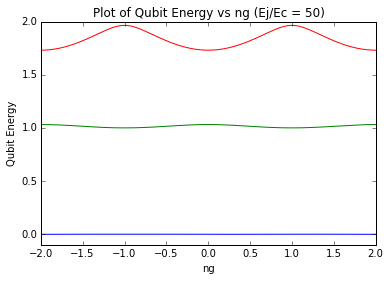

In [4]:
Ej = 10
N_cutoff = Ej/2

w1list = np.linspace(-2, 2, 200) # ng range
evals_mat = np.zeros((len(w1list),2*N_cutoff+1))

idx = 0
for ng in w1list:
    evals, evects = np.linalg.eigh(H_qubit(1,Ej,N_cutoff,ng/2,0,1))
    evals_mat[idx,:] = np.real(evals)
    idx += 1
    energy = evals_mat.transpose()
   
# plot the Qubit Energy as a function of ng
for i in range(3):
    plt.plot(w1list , (energy[i]-energy[0,150])/(energy[1,150]-energy[0,150])) # rescale the plot #

plt.title('Plot of Qubit Energy vs ng (Ej/Ec = 50)')# give plot a title
plt.xlabel('ng')# make axis labels
plt.ylabel('Qubit Energy')
plt.xlim(-2, 2)# set axis limits
plt.ylim(-0.1, 2)
plt.show()

# Plot Transman frequency VS Ej/Ec (Page107 Schuster thesis)

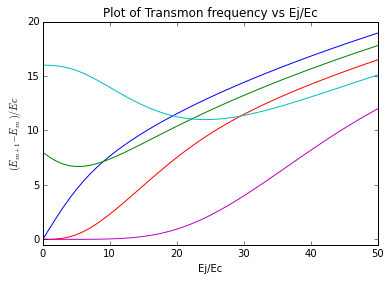

In [5]:
Ejlist = np.linspace(0, 100, 100) # ng range

def E_diff(i):
    E_diff = []
    for Ej in Ejlist:
        evals, evects = np.linalg.eigh(H_qubit(1, Ej, 50, 0.5, 0, 1))
        E_diff.append(evals[i+1]-evals[i])
    return E_diff

# plot the Qubit Energy difference E_m+1 -E_m as a function of ng
for i in range(5):
    plt.plot(Ejlist , E_diff(i))
 
plt.title('Plot of Transmon frequency vs Ej/Ec')# give plot a title
plt.xlabel('Ej/Ec')# make axis labels
plt.ylabel('$(E_{m+1}-E_m)/Ec$')
plt.xlim(0, 50)# set axis limits
plt.ylim(-0.5, 20)
plt.show()

# Plot Anharmonicity VS Ej/Ec

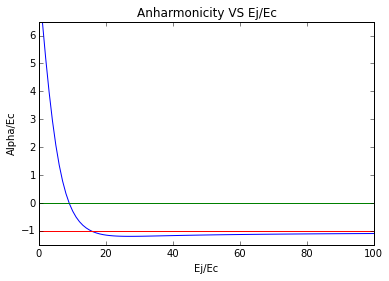

In [6]:
alpha = list(map(lambda x: x[0]-x[1], zip(E_diff(1), E_diff(0))))
plt.plot(Ejlist , alpha)
plt.plot(Ejlist , np.zeros(len(Ejlist)))
plt.plot(Ejlist, np.zeros(len(Ejlist))-1)
plt.title('Anharmonicity VS Ej/Ec')# give plot a title
plt.xlabel('Ej/Ec')# make axis labels
plt.ylabel('Alpha/Ec')
plt.xlim(0, 100)# set axis limits
plt.ylim(-1.5, 6.5)
plt.show()

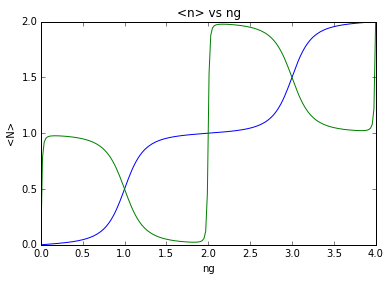

In [7]:
nglist = np.linspace(0, 4, 200) # ng range
evals_mat_n = np.zeros((len(nglist),2*5+1))
evect_g = []
evect_e = []

for ng in nglist:
    evals, ekets = np.linalg.eigh(H_qubit(1, 1, 5, ng/2, 0, 1))
    kets = ekets.transpose()
    g = [kets[0].transpose(), a(11).transpose(), a(11), kets[0]]
    e = [kets[1].transpose(), a(11).transpose(), a(11), kets[1]] 
    evect_g.append(average(g)-5)
    evect_e.append(average(e)-5)
  

plt.plot(nglist , evect_g)
plt.plot(nglist , evect_e)
plt.title('<n> vs ng')# give plot a title
plt.xlabel('ng')# make axis labels
plt.ylabel('<N>')
plt.xlim(0.0, 4.0)# set axis limits
plt.ylim(0.0, 2.0)# set y axis
plt.show()

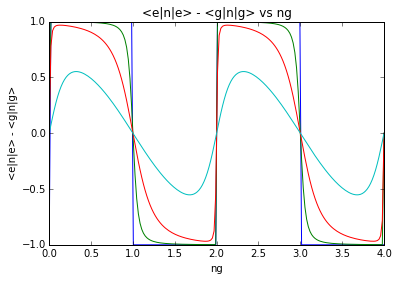

In [8]:
def state_ng(Ej):
    nglist = np.linspace(0, 4, 200) # ng range
    evals_mat_n = np.zeros((len(nglist),2*5+1))
    evect_g = []
    evect_e = []
    diff = []
    for ng in nglist:
        evals, ekets = np.linalg.eigh(H_qubit(1, Ej, 5, ng/2, 0, 1))
        kets = ekets.transpose()
        g = [kets[0].transpose(), a(11).transpose(), a(11), kets[0]]
        e = [kets[1].transpose(), a(11).transpose(), a(11), kets[1]] 
        evect_g.append(average(g)-5)
        evect_e.append(average(e)-5)
        diff.append(average(e) - average(g))
    return diff

for Ej in [0, 0.25, 1, 4]:
    plt.plot(nglist , state_ng(Ej))

plt.title('<e|n|e> - <g|n|g> vs ng')# give plot a title
plt.xlabel('ng')# make axis labels
plt.ylabel('<e|n|e> - <g|n|g>')
plt.xlim(0.0, 4.0)# set axis limits
plt.ylim(-1, 1)# set y axis
plt.show()

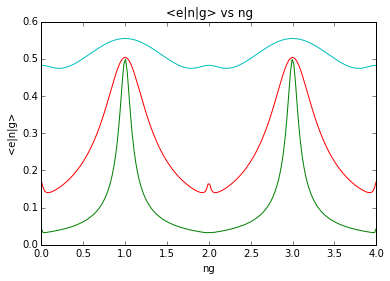

In [9]:
def couple_ng(Ej):
    nglist = np.linspace(0, 4, 200) # ng range
    evals_mat_n = np.zeros((len(nglist),2*5+1))
    couple = []
    for ng in nglist:
        evals, ekets = np.linalg.eigh(H_qubit(1, Ej, 5, ng/2, 0, 1))
        kets = ekets.transpose()
        c = [kets[0].transpose(), a(11).transpose(), a(11), kets[1]] 
        couple.append(abs(average(c)))
    return couple

for Ej in [0, 0.25, 1, 4]:
    plt.plot(nglist , couple_ng(Ej))

plt.title('<e|n|g> vs ng')# give plot a title
plt.xlabel('ng')# make axis labels
plt.ylabel('<e|n|g>')
plt.xlim(0.0, 4.0)# set axis limits
plt.ylim(0, 0.6)# set y axis
plt.show()

In [10]:
def g_couple(n,m,N_charge):
    ejlist = np.linspace(0, 100, 100) # ng range
    couple = []
    s = []
    for ej in ejlist:
        evals, ekets = np.linalg.eigh(H_qubit(1, Ej, N_charge, 0.5/2, 0, 1))
        kets = ekets.transpose()
        for i in range(-N_charge, N_charge+1,1):
            je = np.dot(bra(2*N_charge+1,i + N_charge),kets[m])
            gi = np.dot(kets[n].transpose(),ket(2*N_charge+1,i + N_charge))
            couple.append(abs(gi*i*je))
        s.append(np.sum(couple))
    return s


# Off-diagonal matrix elements of the Cooper pair number operator as a function of the energy ratio EJ/EC 􏰀ng=1/2􏰁

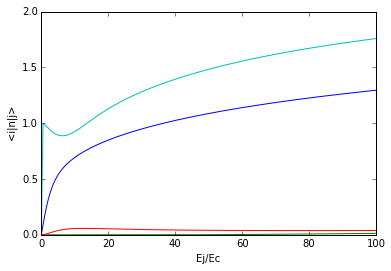

In [48]:
def N_(N_charge):
    n = []
    for i in range(-N_charge, N_charge+1,1):
        n.append(i)
    return diags([n],[0],shape = (2*N_cutoff+1, 2*N_cutoff+1)).toarray()

def couple_ng(n,m):
    ejlist = np.linspace(0, 100, 200) # Ej range
    couple = []
    for ej in ejlist:
        evals, ekets = np.linalg.eigh(H_qubit(1, ej, 5, 1, 0, 1))
        kets = ekets.transpose()
        c = [kets[n].transpose(), N_(5), kets[m]] 
        couple.append(abs(average(c)))
    return couple


ejlist = np.linspace(0, 100, 200)

plt.plot(ejlist , couple_ng(1,0))
plt.plot(ejlist , couple_ng(2,0))
plt.plot(ejlist , couple_ng(3,0))
plt.plot(ejlist , couple_ng(2,1))

plt.xlabel('Ej/Ec')# make axis labels
plt.ylabel('<i|n|j>')
plt.xlim(0.0, 100)# set axis limits
plt.ylim(0, 2.0)# set y axis
plt.show()

In [17]:
def N_(N_charge):
    n = []
    for i in range(-N_charge, N_charge+1,1):
        n.append(i)
    return diags([n],[0],shape = (2*N_cutoff+1, 2*N_cutoff+1)).toarray()

def couple_ng(n,m):
    ejlist = np.linspace(-2, 2, 50) # flux range
    couple = []
    for flux in ejlist:
        evals, ekets = np.linalg.eigh(H_qubit(1.7, 11.65, 3, 0.5, flux, 0.05))
        kets = ekets.transpose()
        c = [kets[n].transpose(), N_(3), kets[m]] 
        couple.append(abs(average(c)))
    return couple


ejlist = np.linspace(-2, 2, 50)

plt.plot(ejlist , couple_ng(1,0))

plt.xlabel('flux')# make axis labels
plt.ylabel('<i|n|j>')
plt.xlim(-2, 2)# set axis limits
plt.ylim(0, 2.0)# set y axis
plt.show()

ValueError: Diagonal length (index 0: 7 at offset 0) does not agree with matrix size (11, 11).